# The Newton's Fractal
## A boundary set in the complex plane which is characterized by Newton's method applied to a fixed polynomial p(S) ∈ ℂ[S] or transcendental function.
> Created By: [Pedro Varela](https://github.com/pedro-varela1)

<img src="https://drive.google.com/uc?id=1wkR69UuZ1grMLKO92iNDnRfUWwRLUsi2"
    style="width:500px; float: right; margin: 0 40px 40px 40px;"></img>
  
![divider](https://webstockreview.net/images/divider-clipart-design-line-5.png)

Primeiramente, importamos as bibliotecas que iremos utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Vamos criar uma lista de cores para separar as raízes:

In [3]:
colors = ['b', 'r', 'g']

E um valor que representa a tolerância (erro máximo possível) para a definição das raízes no método de Newton-Raphson:

In [4]:
error_max = 1.e-8

Vamos aplicar o método de Newton-Raphson a f(z), através da criação de uma função:



In [11]:
def newton(s0, f, f_der, MAX_IT=1000):
    s = s0 #Chute Inicial
    for i in range(MAX_IT): #MAX_IT: Número máximo de Iterações
        ds = f(s)/f_der(s)
        if abs(ds) < error_max:
            return s
        s -= ds
    return False #Para a não convergência

Além disso, é necessária uma função para plotar os gráficos com a biblioteca matplotlib:

In [12]:
def plot_newton_fractal(f, f_der, n=200, domain=(-2, 2, -2, 2)):
    roots = [] #Raízes
    m = np.zeros((n, n)) 

    def get_root_index(roots, r): #Retorna o index das raízes no interior do domínio
        try:
            return np.where(np.isclose(roots, r, atol=error_max))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain #Delimitações do domínio
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            s0 = x + y*1j
            r = newton(s0, f, f_der)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        cmap = 'hsv'
    else:
        cmap = ListedColormap(colors[:nroots])

    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()


Por fim, utilizando as funções anteriormente criadas, é possível visualizar o Fractal de Newton do polinômio:

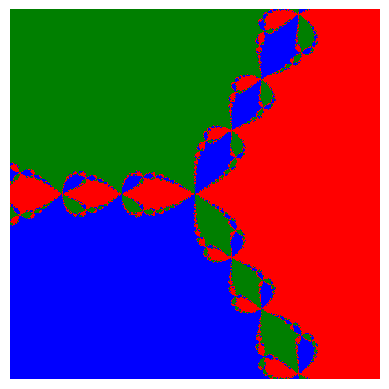

In [13]:
f = lambda s: s**3 - 1   #Polinômio
f_der = lambda s: 3*s**2   #Derivada do Polinômio

plot_newton_fractal(f, f_der, n=500)